## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  66.253342   217.833891  0.506462   4.638406  128.740167
1  56.559205   412.586364  0.726681  10.076097  305.086092
2  20.259213   405.336447  0.014950   2.374237   21.060322
3  58.658467   888.592923  0.346006   2.546642  312.857084
4   9.654688  1195.648699  0.659986   7.483313  789.133105


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0308585	total: 57.5ms	remaining: 57.5s
1:	learn: 1.0198361	total: 58.3ms	remaining: 29.1s
2:	learn: 1.0099417	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9986753	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9845455	total: 59.9ms	remaining: 11.9s
5:	learn: 0.9726518	total: 60.4ms	remaining: 10s
6:	learn: 0.9590834	total: 60.9ms	remaining: 8.64s
7:	learn: 0.9450832	total: 61.3ms	remaining: 7.6s
8:	learn: 0.9346094	total: 61.8ms	remaining: 6.8s
9:	learn: 0.9226518	total: 62.3ms	remaining: 6.16s
10:	learn: 0.9119326	total: 62.6ms	remaining: 5.63s
11:	learn: 0.8970352	total: 63.1ms	remaining: 5.2s
12:	learn: 0.8846379	total: 63.5ms	remaining: 4.82s
13:	learn: 0.8738446	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8621346	total: 64.3ms	remaining: 4.22s
15:	learn: 0.8516473	total: 64.8ms	remaining: 3.98s
16:	learn: 0.8392012	total: 65.2ms	remaining: 3.77s
17:	learn: 0.8314836	total: 65.7ms	remaining: 3.59s
18:	learn: 0.8239236	total: 66.3ms	remaining: 3.42

138:	learn: 0.2120527	total: 117ms	remaining: 725ms
139:	learn: 0.2099396	total: 118ms	remaining: 723ms
140:	learn: 0.2082537	total: 118ms	remaining: 719ms
141:	learn: 0.2061914	total: 119ms	remaining: 716ms
142:	learn: 0.2041925	total: 119ms	remaining: 713ms
143:	learn: 0.2025898	total: 119ms	remaining: 709ms
144:	learn: 0.2006615	total: 120ms	remaining: 706ms
145:	learn: 0.1986686	total: 120ms	remaining: 703ms
146:	learn: 0.1964365	total: 121ms	remaining: 700ms
147:	learn: 0.1949753	total: 121ms	remaining: 697ms
148:	learn: 0.1930317	total: 122ms	remaining: 695ms
149:	learn: 0.1908845	total: 122ms	remaining: 691ms
150:	learn: 0.1893971	total: 122ms	remaining: 688ms
151:	learn: 0.1875180	total: 123ms	remaining: 685ms
152:	learn: 0.1860765	total: 123ms	remaining: 681ms
153:	learn: 0.1845209	total: 123ms	remaining: 678ms
154:	learn: 0.1829721	total: 124ms	remaining: 675ms
155:	learn: 0.1811055	total: 124ms	remaining: 671ms
156:	learn: 0.1793784	total: 124ms	remaining: 668ms
157:	learn: 

304:	learn: 0.0645196	total: 186ms	remaining: 423ms
305:	learn: 0.0642255	total: 186ms	remaining: 423ms
306:	learn: 0.0639183	total: 187ms	remaining: 422ms
307:	learn: 0.0635284	total: 187ms	remaining: 421ms
308:	learn: 0.0633189	total: 188ms	remaining: 419ms
309:	learn: 0.0630402	total: 188ms	remaining: 418ms
310:	learn: 0.0628314	total: 189ms	remaining: 418ms
311:	learn: 0.0626404	total: 189ms	remaining: 417ms
312:	learn: 0.0624513	total: 190ms	remaining: 416ms
313:	learn: 0.0620084	total: 190ms	remaining: 415ms
314:	learn: 0.0615683	total: 190ms	remaining: 414ms
315:	learn: 0.0611479	total: 191ms	remaining: 413ms
316:	learn: 0.0609651	total: 191ms	remaining: 412ms
317:	learn: 0.0606459	total: 192ms	remaining: 411ms
318:	learn: 0.0604052	total: 192ms	remaining: 410ms
319:	learn: 0.0600397	total: 193ms	remaining: 409ms
320:	learn: 0.0598241	total: 193ms	remaining: 408ms
321:	learn: 0.0596415	total: 193ms	remaining: 407ms
322:	learn: 0.0593746	total: 194ms	remaining: 406ms
323:	learn: 

529:	learn: 0.0273579	total: 284ms	remaining: 252ms
530:	learn: 0.0272365	total: 285ms	remaining: 252ms
531:	learn: 0.0271019	total: 285ms	remaining: 251ms
532:	learn: 0.0269818	total: 285ms	remaining: 250ms
533:	learn: 0.0268469	total: 286ms	remaining: 249ms
534:	learn: 0.0267114	total: 286ms	remaining: 249ms
535:	learn: 0.0265969	total: 287ms	remaining: 248ms
536:	learn: 0.0264663	total: 287ms	remaining: 247ms
537:	learn: 0.0264013	total: 287ms	remaining: 247ms
538:	learn: 0.0262724	total: 288ms	remaining: 246ms
539:	learn: 0.0262083	total: 289ms	remaining: 246ms
540:	learn: 0.0260797	total: 289ms	remaining: 245ms
541:	learn: 0.0259534	total: 290ms	remaining: 245ms
542:	learn: 0.0258904	total: 290ms	remaining: 244ms
543:	learn: 0.0257835	total: 290ms	remaining: 244ms
544:	learn: 0.0256592	total: 291ms	remaining: 243ms
545:	learn: 0.0255448	total: 291ms	remaining: 242ms
546:	learn: 0.0254404	total: 292ms	remaining: 242ms
547:	learn: 0.0253651	total: 292ms	remaining: 241ms
548:	learn: 

680:	learn: 0.0168974	total: 352ms	remaining: 165ms
681:	learn: 0.0168715	total: 353ms	remaining: 165ms
682:	learn: 0.0168409	total: 354ms	remaining: 164ms
683:	learn: 0.0168208	total: 354ms	remaining: 164ms
684:	learn: 0.0167533	total: 355ms	remaining: 163ms
685:	learn: 0.0166896	total: 355ms	remaining: 163ms
686:	learn: 0.0166318	total: 356ms	remaining: 162ms
687:	learn: 0.0165696	total: 356ms	remaining: 161ms
688:	learn: 0.0165155	total: 356ms	remaining: 161ms
689:	learn: 0.0164458	total: 357ms	remaining: 160ms
690:	learn: 0.0163962	total: 358ms	remaining: 160ms
691:	learn: 0.0163598	total: 358ms	remaining: 159ms
692:	learn: 0.0162914	total: 359ms	remaining: 159ms
693:	learn: 0.0162540	total: 359ms	remaining: 158ms
694:	learn: 0.0161882	total: 360ms	remaining: 158ms
695:	learn: 0.0161642	total: 360ms	remaining: 157ms
696:	learn: 0.0161452	total: 360ms	remaining: 157ms
697:	learn: 0.0161215	total: 361ms	remaining: 156ms
698:	learn: 0.0160981	total: 361ms	remaining: 155ms
699:	learn: 

936:	learn: 0.0094235	total: 467ms	remaining: 31.4ms
937:	learn: 0.0094173	total: 467ms	remaining: 30.9ms
938:	learn: 0.0093807	total: 468ms	remaining: 30.4ms
939:	learn: 0.0093346	total: 468ms	remaining: 29.9ms
940:	learn: 0.0093039	total: 468ms	remaining: 29.4ms
941:	learn: 0.0092803	total: 469ms	remaining: 28.9ms
942:	learn: 0.0092323	total: 470ms	remaining: 28.4ms
943:	learn: 0.0092263	total: 470ms	remaining: 27.9ms
944:	learn: 0.0091989	total: 470ms	remaining: 27.4ms
945:	learn: 0.0091731	total: 471ms	remaining: 26.9ms
946:	learn: 0.0091686	total: 471ms	remaining: 26.4ms
947:	learn: 0.0091641	total: 472ms	remaining: 25.9ms
948:	learn: 0.0091597	total: 472ms	remaining: 25.4ms
949:	learn: 0.0091571	total: 473ms	remaining: 24.9ms
950:	learn: 0.0091512	total: 473ms	remaining: 24.4ms
951:	learn: 0.0091162	total: 474ms	remaining: 23.9ms
952:	learn: 0.0090819	total: 474ms	remaining: 23.4ms
953:	learn: 0.0090425	total: 475ms	remaining: 22.9ms
954:	learn: 0.0090082	total: 475ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


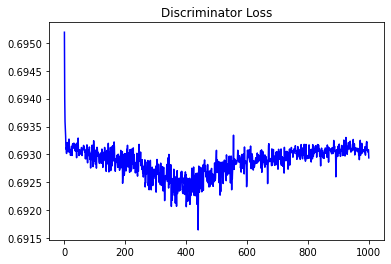

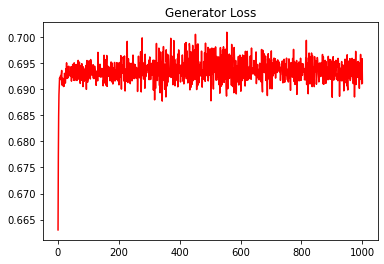

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.004406559730056305


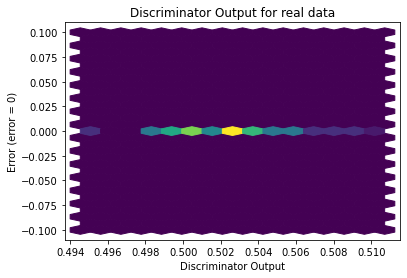

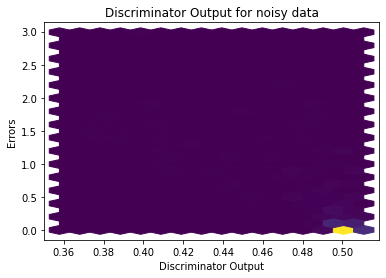

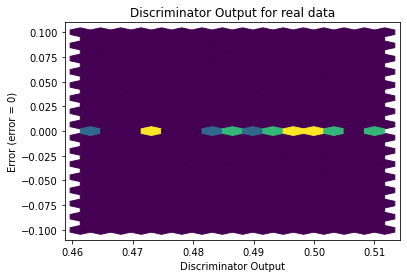

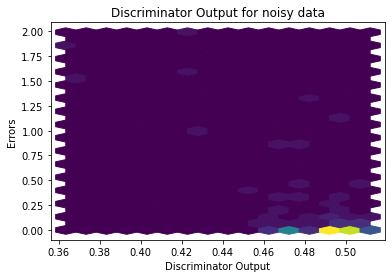

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1135]], requires_grad=True)
